# Exercise 00 - Hypothesis Concept in Machine Learning

In [2]:
import numpy as np

In [3]:
def dot(x, y):
    dot = 0.0
#     print(x.ndim)
#     print(y.ndim)
#     if not isinstance(x, np.ndarray) or x.size == 0 or x.ndim != 1:
#         return None
#     if not isinstance(y, np.ndarray) or y.size == 0 or y.ndim != 1:
#         return None
#     if x.ndim != y.ndim:
#         return None
    
    for elem in range(x.size):
        dot += x[elem] * y[elem]
    return dot

In [4]:
def predict_(theta, X):
    if not isinstance(X, np.ndarray) or X.size == 0 or X.ndim != 2:
        return None
    if not isinstance(theta, np.ndarray) or theta.size == 0 or theta.ndim > 2:
        return None
    if X.shape[1] + 1 != theta.size:
        print("Incompatible dimension match between X and theta")
        return None
    pred = np.empty(0)
    X_conc = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
    for j in range(X.shape[0]):
        pred = np.append(pred, dot(theta[:,0], X_conc[j]))
    return (pred.reshape(-1, 1))

In [5]:
import numpy as np
X1 = np.array([[0.], [1.], [2.], [3.], [4.]])
theta1 = np.array([[2.], [4.]])
print(predict_(theta1, X1))
# array([[2], [6], [10], [14.], [18.]])

X2 = np.array([[1], [2], [3], [5], [8]])
theta2 = np.array([[2.]])
print(predict_(theta2, X2))

X3 = np.array([[0.2, 2., 20.], [0.4, 4., 40.], [0.6, 6., 60.], [0.8, 8.,
80.]])
theta3 = np.array([[0.05], [1.], [1.], [1.]])
print(predict_(theta3, X3))
# array([[22.25], [44.45], [66.65], [88.85]])

[[ 2.]
 [ 6.]
 [10.]
 [14.]
 [18.]]
Incompatible dimension match between X and theta
None
[[22.25]
 [44.45]
 [66.65]
 [88.85]]


# Exercise 01 - Cost function Concept

In [6]:
def cost_elem_(theta, X, Y):
    J_elem = (1 / (2 * X.shape[0])) * (predict_(theta, X) - Y)**2
    return J_elem.reshape(-1, 1)

def cost_(theta, X, Y):
    J_value = 0.0
    J_elem = cost_elem_(theta, X, Y)
    for i in range(X.shape[0]):
        J_value += float(J_elem[i])
    return J_value

In [7]:
import numpy as np
X1 = np.array([[0.], [1.], [2.], [3.], [4.]])
theta1 = np.array([[2.], [4.]])
Y1 = np.array([[2.], [7.], [12.], [17.], [22.]])

print(cost_elem_(theta1, X1, Y1))
print()
print(cost_(theta1, X1, Y1))

X2 = np.array([[0.2, 2., 20.], [0.4, 4., 40.], [0.6, 6., 60.], [0.8, 8.,
80.]])
theta2 = np.array([[0.05], [1.], [1.], [1.]])
Y2 = np.array([[19.], [42.], [67.], [93.]])

print(cost_elem_(theta2, X2, Y2))
print()
print(cost_(theta2, X2, Y2))

[[0. ]
 [0.1]
 [0.4]
 [0.9]
 [1.6]]

3.0
[[1.3203125]
 [0.7503125]
 [0.0153125]
 [2.1528125]]

4.238750000000007


# Exercise 02 - Descent Gradient

In [8]:
def mat_mat_prod(x, y):
#     if not isinstance(x, np.ndarray) or x.size == 0 or x.ndim != 2:
#         return None
#     if not isinstance(y, np.ndarray) or y.size == 0 or x.ndim != 2:
#         return None
#     if x.shape[1] != y.shape[0]:
#         return None
    for j in range(y.shape[1]):
        if j == 0:
            prod = mat_vec_prod(x, y[:,j])
        else:
            prod = np.append(prod, mat_vec_prod(x, y[:,j]), axis=1)
    return prod

def mat_vec_prod(x, y):
    prod = np.empty(0)
#     if not isinstance(x, np.ndarray) or x.size == 0 or x.ndim != 2:
#         return None
#     if not isinstance(y, np.ndarray) or y.size == 0:
#         return None
#     if x.shape[1] != y.shape[0]:
#         return None
    for elem in x:
        prod = np.append(prod, dot(elem, y.ravel()))
    return prod.reshape(-1, 1)

In [9]:
def gradient(x, y, theta):
    """Computes a gradient vector from three non-empty numpy.ndarray, using
    a for-loop. The two arrays must have the compatible dimensions.
    Args:
     x: has to be an numpy.ndarray, a matrice of dimension m * n.
     y: has to be an numpy.ndarray, a vector of dimension m * 1.
     theta: has to be an numpy.ndarray, a vector n * 1.
    Returns:
     The gradient as a numpy.ndarray, a vector of dimensions n * 1.
     None if x, y, or theta are empty numpy.ndarray.
     None if x, y and theta do not have compatible dimensions.
    Raises:
     This function should not raise any Exception.
    """
    x = np.concatenate((np.ones((x.shape[0],1)), x), axis=1)
    nabla = np.empty(0)
    if not isinstance(x, np.ndarray) or x.size == 0 or x.ndim != 2:
        print('Error Gradient : x dim')
        return None
    if not isinstance(y, np.ndarray) or y.size == 0 or y.ndim > 2:
        print('Error Gradient : y dim')
        return None
    if not isinstance(theta, np.ndarray) or theta.size == 0 or theta.ndim > 2:
        print('Error Gradient : theta dim')
        return None
    if x.shape[0] != y.size:
        print('Error Gradient : x.shape[0] != y.size')
        return None
    if x.shape[1] != theta.size:
        print('Error Gradient : x.shape[1] != theta.size')
        return None
    for j in range(theta.size):
        my_sum = 0.0
        for elem in range(y.size):
            my_sum += (dot(theta, x[elem,:].reshape(-1 ,1)) - y[elem]) * x[elem,j]
        nabla = np.append(nabla, my_sum / y.size)
    return nabla.reshape(-1, 1)

In [10]:
def fit_(theta, X, Y, alpha=0.01, n_cycle=2000):
    for i in range(n_cycle):
        theta = theta - (alpha * gradient(X, Y, theta))
    return theta

In [11]:
X1 = np.array([[0.], [1.], [2.], [3.], [4.]])
Y1 = np.array([[2.], [6.], [10.], [14.], [18.]])
theta1 = np.array([[1.], [1.]])
theta1 = fit_(theta1, X1, Y1, alpha = 0.01, n_cycle=2000)
print(theta1)


[[2.00011814]
 [3.99995856]]


# Exercise 03 - The Linear Regression with Class

In [12]:
class MyLinearRegression():
    def __init__(self, theta):
        if (not isinstance(theta, np.ndarray) and not isinstance(theta, list))\
            or (isinstance(theta, np.ndarray) and (theta.size == 0 or theta.ndim > 2))\
            or (isinstance(theta, list) and len(theta) == 0):
                print('Error init : theta dim')
                return None
        self.theta = np.array(theta)
    def predict_(self, X):
        if not isinstance(X, np.ndarray) or X.size == 0 or X.ndim != 2:
            return -1
        if not isinstance(self.theta, np.ndarray) or self.theta.size == 0 or self.theta.ndim > 2:
            return -2
        if X.shape[1] + 1 != self.theta.size:
            print("Incompatible dimension match between X and theta")
            return -3
        pred = np.empty(0)
        X_conc = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
        for j in range(X.shape[0]):
            pred = np.append(pred, dot(self.theta[:,0], X_conc[j]))
        self.pred = pred.reshape(-1, 1)
        return (pred.reshape(-1, 1))

    def cost_elem_(self, X, Y):
        J_elem = (1 / (2 * X.shape[0])) * (predict_(self.theta, X) - Y)**2
        return J_elem.reshape(-1, 1)

    def cost_(self, X, Y):
        J_value = 0.0
        J_elem = cost_elem_(self.theta, X, Y)
        for i in range(X.shape[0]):
            J_value += float(J_elem[i])
        return J_value
    def fit_(self, X, Y, alpha=0.01, n_cycle=2000):
        for i in range(n_cycle):
            self.theta = self.theta - (alpha * gradient(X, Y, self.theta))
        return self.theta
    def mse_(self, x, y):
        mse_ = 0.0
        y_hat = self.pred
        for i in range(y.size):
            mse_ += (y[i] - y_hat[i])**2
        return mse_ / y.size

In [13]:
X = np.array([[1., 1., 2., 3.], [5., 8., 13., 21.], [34., 55., 89., 144.]])
Y = np.array([[23.], [48.], [218.]])
mylr = MyLinearRegression([[1.], [1.], [1.], [1.], [1]])
print(mylr.predict_(X))

print(mylr.cost_elem_(X,Y))

print(mylr.cost_(X,Y))

# mylr.fit_(X, Y, alpha = 1.6e-4, n_cycle=200000)
# print(mylr.theta)

# print(mylr.predict_(X))

# print(mylr.cost_elem_(X,Y))

# print(mylr.cost_(X,Y))

[[  8.]
 [ 48.]
 [323.]]
[[  37.5]
 [   0. ]
 [1837.5]]
1875.0


# Exercise 04 - Linear Regression

In [14]:
def mse(y, y_hat):
    mse_ = 0.0
    for i in range(y.size):
        mse_ += (y[i] - y_hat[i])**2
    return mse_ / y.size

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../subjects/day01/resources/are_blue_pills_magics.csv")
Xpill = np.array(data.Micrograms).reshape(-1,1)
Yscore = np.array(data.Score).reshape(-1,1)

NameError: name 'df' is not defined

In [17]:
model1 = MyLinearRegression(np.array([[89.0], [-8]]))
model2 = MyLinearRegression(np.array([[89.0], [-6]]))

In [18]:
Y_model1 = model1.predict_(Xpill)
Y_model2 = model2.predict_(Xpill)

In [19]:
print(model1.mse_(Xpill, Yscore))
print(mse(Yscore, Y_model1))

[57.60304286]
[57.60304286]


In [23]:
print(model2.mse_(Xpill, Yscore))
print(mse(Yscore, Y_model1))

[232.16344286]
[57.60304286]


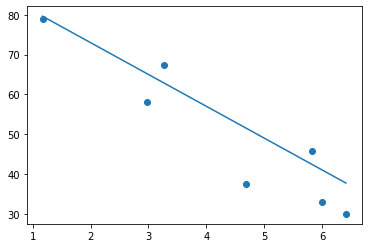

In [24]:
plt.scatter(Xpill, Yscore)
plt.plot(Xpill, Y_model1)
plt.show()

# Exercise 05 - Mutiples features and Linear Gradient Descent